Após a extração dos dados no notebook *coleta_dados_video.ipynb*, fiz o labeling de 45% dos vídeos, categorizando quais eu assistira (1) e quais eu não assistiria (0).
Após o processo de *labeling* dos dados, iniciei o processo de construção de um primeiro algoritmo.

## Importação de Bibliotecas usadas

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Leitura dos dados (já tageados)

In [2]:
features = pd.read_excel('raw_data_with_labels.xlsx')
features = features[features['y'].notnull()]
features.shape

(500, 5)

Nesse momento, criei uma feature calculada (*view_per_day*), pois o um campo numérico é melhor para algoritmos do que campos de data.

In [3]:
features['view_per_day'] = round(features['view_count'] / features['tempo_desde_pub'], 4)
features = features.drop(['tempo_desde_pub'], axis=1)
features.head()

,title,y,upload_date,view_count,view_per_day
0,How Far is Too Far? | The Age of A.I.,0.0,2019-12-18,49218295,79002.0787
1,AlphaGo - The Movie | Full award-winning docum...,0.0,2020-03-13,26896993,50087.5102
2,Artificial intelligence and algorithms: pros a...,0.0,2019-09-26,6424768,9100.2380
3,"#AndroidDevChallenge - Helpful innovation, pow...",0.0,2020-06-22,5779436,13255.5872
4,Become a DATA ANALYST with NO degree?!? The Go...,0.0,2021-03-17,2037151,12125.8988


<AxesSubplot:>

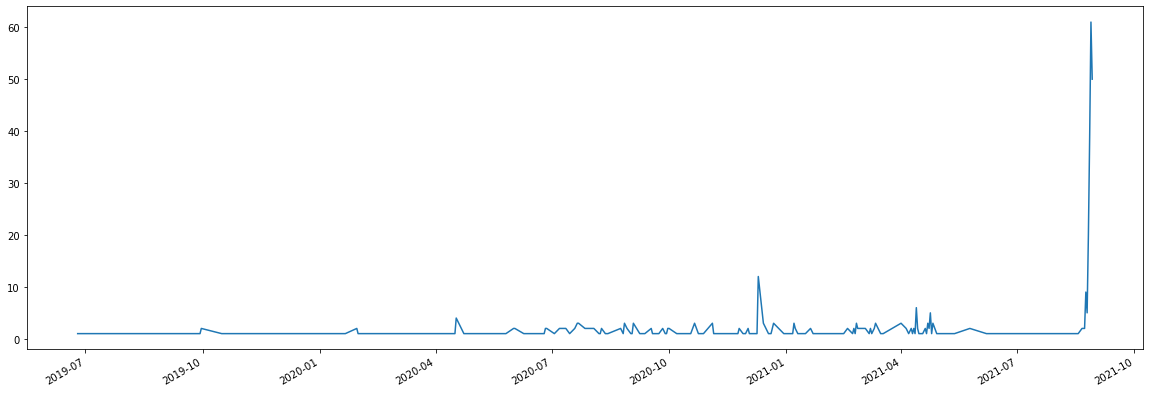

In [4]:
features.upload_date.value_counts().plot(figsize=(20, 7))

### Separação de dados de treino e teste

In [5]:
X = features.copy().drop(['y', 'title', 'upload_date'], axis=1)
y = features['y']

In [6]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.5, random_state=0)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((250, 2), (250, 2), (250,), (250,))

Iniciei um primeiro teste de algoritmo com o Decision Tree (Classifier pois a questão de negócio é classificar vídeos que eu assistiria).
Escolhi esse algoritmo pois se trata de um bom algoritmo, com baixa complexidade de hiperparâmetros e implementação.
Nesse primeiro momento, não tunei parâmetros ou utilizei técnicas de NLP.

In [23]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced')
mdl.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [24]:
p = mdl.predict_proba(Xval)[ : , 1]

Com a finalidade de avaliar o meu modelo, gerei métricas de **Precisão** e **Area Under Curve**
Mais tarde irei utilizar essas mesmas métricas para avaliar se as variações do meu modelo performaram melhor ou pior do que as anteriores

In [25]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [26]:
average_precision_score(yval, p)

0.11342732376793511

In [27]:
roc_auc_score(yval, p)

0.4945302445302446

In [28]:
from matplotlib import pylab

In [29]:
from sklearn.tree import plot_tree

[Text(223.2, 453.0, 'view_per_day <= 0.321\ngini = 0.5\nsamples = 250\nvalue = [125.0, 125.0]'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 20\nvalue = [11.062, 0.0]'),
 Text(334.79999999999995, 271.8, 'view_per_day <= 0.476\ngini = 0.499\nsamples = 230\nvalue = [113.938, 125.0]'),
 Text(223.2, 90.59999999999997, 'gini = 0.174\nsamples = 6\nvalue = [1.659, 15.625]'),
 Text(446.4, 90.59999999999997, 'gini = 0.5\nsamples = 224\nvalue = [112.279, 109.375]')]

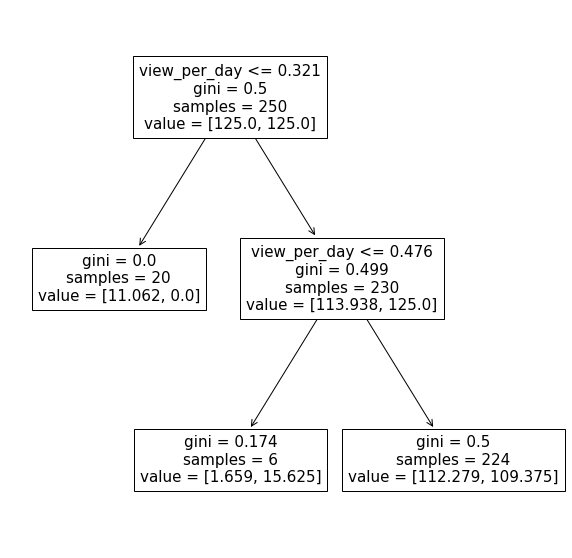

In [30]:
fig, ax = pylab.subplots(1, 1, figsize=(10, 10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)